# Problem Statement

The COCO dataset is large image dataset designed for Object Detection, Segmentation, person key points detection, and Caption Generation. The objective is to use Mask RCNN technique for instance segmentation on the COCO dataset

# Dataset Description

COCO Dataset COCO is a large-scale object detection, segmentation, and captioning dataset. COCO has several features: 

>- Object segmentation

>- Recognition in context 

>- Superpixel stuff segmentation 

>- 330K images (>200K labeled) 

>- 1.5 million object instances o 80 object categories 

>- 91 stuff categories o 5 captions per image o 250,000 people with keypoints

# Clone the Facebook Detectron Model

In [1]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/facebookresearch/Detectron.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  #clone the model
  !git clone -q --depth 1 $git_repo_url
  #install dependencies
  !cd $project_name && pip install -q -r requirements.txt
  #build
  !cd $project_name && make
# test Detectron
!python $project_name/detectron/tests/test_spatial_narrow_as_op.py

     |████████████████████████████████| 256kB 8.0MB/s 
python setup.py develop --user
Compiling detectron/utils/cython_bbox.pyx because it changed.
Compiling detectron/utils/cython_nms.pyx because it changed.
[1/2] Cythonizing detectron/utils/cython_bbox.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/Detectron/detectron/utils/cython_bbox.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/2] Cythonizing detectron/utils/cython_nms.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/Detectron/detectron/utils/cython_nms.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running develop
running egg_info
creating Detectron.egg-info
writing Detectron.egg-info/PKG-INFO
writin

# Import the libraries

In [3]:
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = False

from IPython.display import clear_output

# Load and Visualize a test image

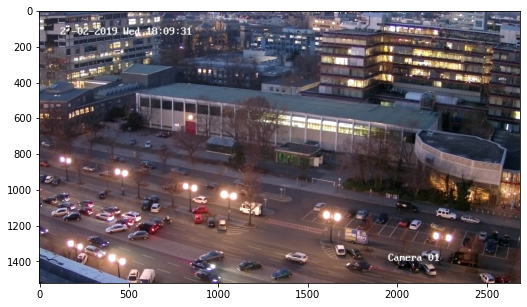

In [4]:
IMAGE_URL = 'https://raw.githubusercontent.com/tugstugi/dl-colab-notebooks/master/resources/traffic_camera.jpg'

image_file = basename(IMAGE_URL)
image_file_ext = splitext(image_file)[1][1:]
images_dir = 'images'
!mkdir -p $images_dir && rm -rf $images_dir/*
!wget -q -O $images_dir/$image_file $IMAGE_URL

plt.figure(figsize=(10, 5))
plt.imshow(matplotlib.image.imread(join(images_dir, image_file)))

# Load the Pre-trained model

In [5]:
MODEL_CFG = 'e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml'
PRETRAINED_MODEL_URL = 'https://dl.fbaipublicfiles.com/detectron/36494496/12_2017_baselines/e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml.07_50_11.fkwVtEvg/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl'

!cd $project_name && python tools/infer_simple.py \
    --cfg configs/12_2017_baselines/$MODEL_CFG \
    --wts $PRETRAINED_MODEL_URL \
    --thresh 0.7 \
    --output-dir ../output/ --output-ext png --always-out \
    --image-ext $image_file_ext \
    ../$images_dir

Found Detectron ops lib: /usr/local/lib/python3.6/dist-packages/torch/lib/libcaffe2_detectron_ops_gpu.so
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
INFO io.py: 112: Downloading remote file https://dl.fbaipublicfiles.com/detectron/36494496/12_2017_baselines/e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml.07_50_11.fkwVtEvg/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl to /tmp/detectron-download-cache/36494496/12_2017_baselines/e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml.07_50_11.fkwV

# Visualize the result

In [6]:
plt.figure(figsize=(50, 50))
plt.imshow(matplotlib.image.imread('output/%s.png' % image_file))

Output hidden; open in https://colab.research.google.com to view.